# Dimensionality reduction

The curse of dimensionality occurs because the sample density decreases exponentially with the increase of the dimensionality. When we keep adding features without increasing the number of training samples as well, the dimensionality of the feature space grows and becomes sparser and sparser. Due to this sparsity, it becomes much easier to find a “perfect” solution for the machine learning model which highly likely leads to overfitting.

Overfitting happens when the model corresponds too closely to a particular set of data and doesn’t generalize well. An overfitted model would work too well on the training dataset so that it fails on future data and makes the prediction unreliable.

##  Principal Component Analysis (PCA)
The most used dimensionaly reduction method
[lecture link](https://plotly.com/python/pca-visualization/)

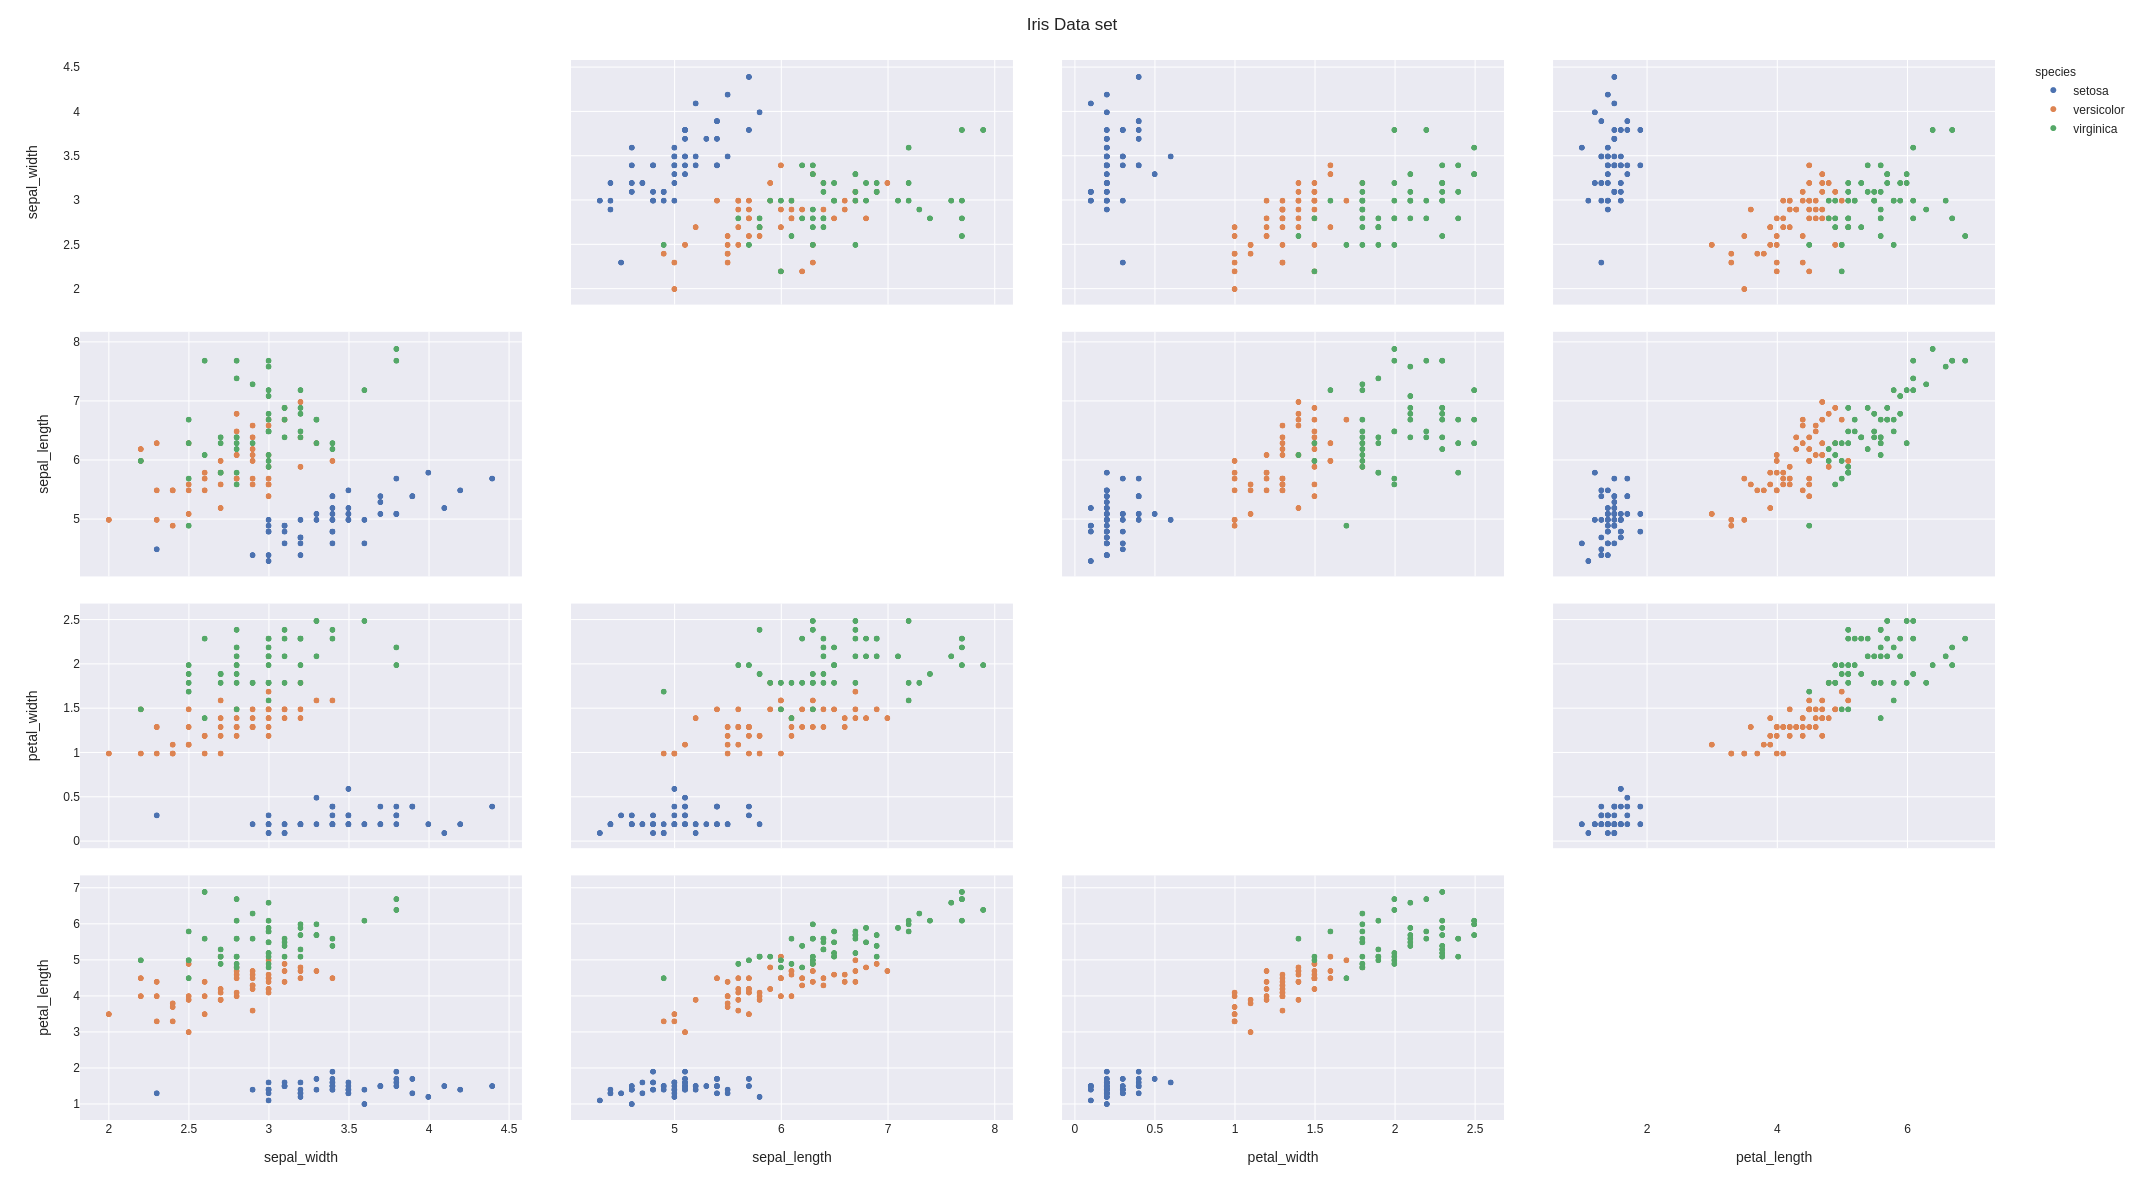

In [1]:
import plotly.express as px

df = px.data.iris()
features = ["sepal_width", "sepal_length", "petal_width", "petal_length"]

fig = px.scatter_matrix(
    df,
    dimensions=features,
    color="species",
    template ="seaborn"
)
fig.update_traces(diagonal_visible=False)
fig.update_layout(
    title='Iris Data set',
    dragmode='select',
    width=1600,
    height=1200,
    hovermode='closest',
    template ="seaborn"
)
fig.show()

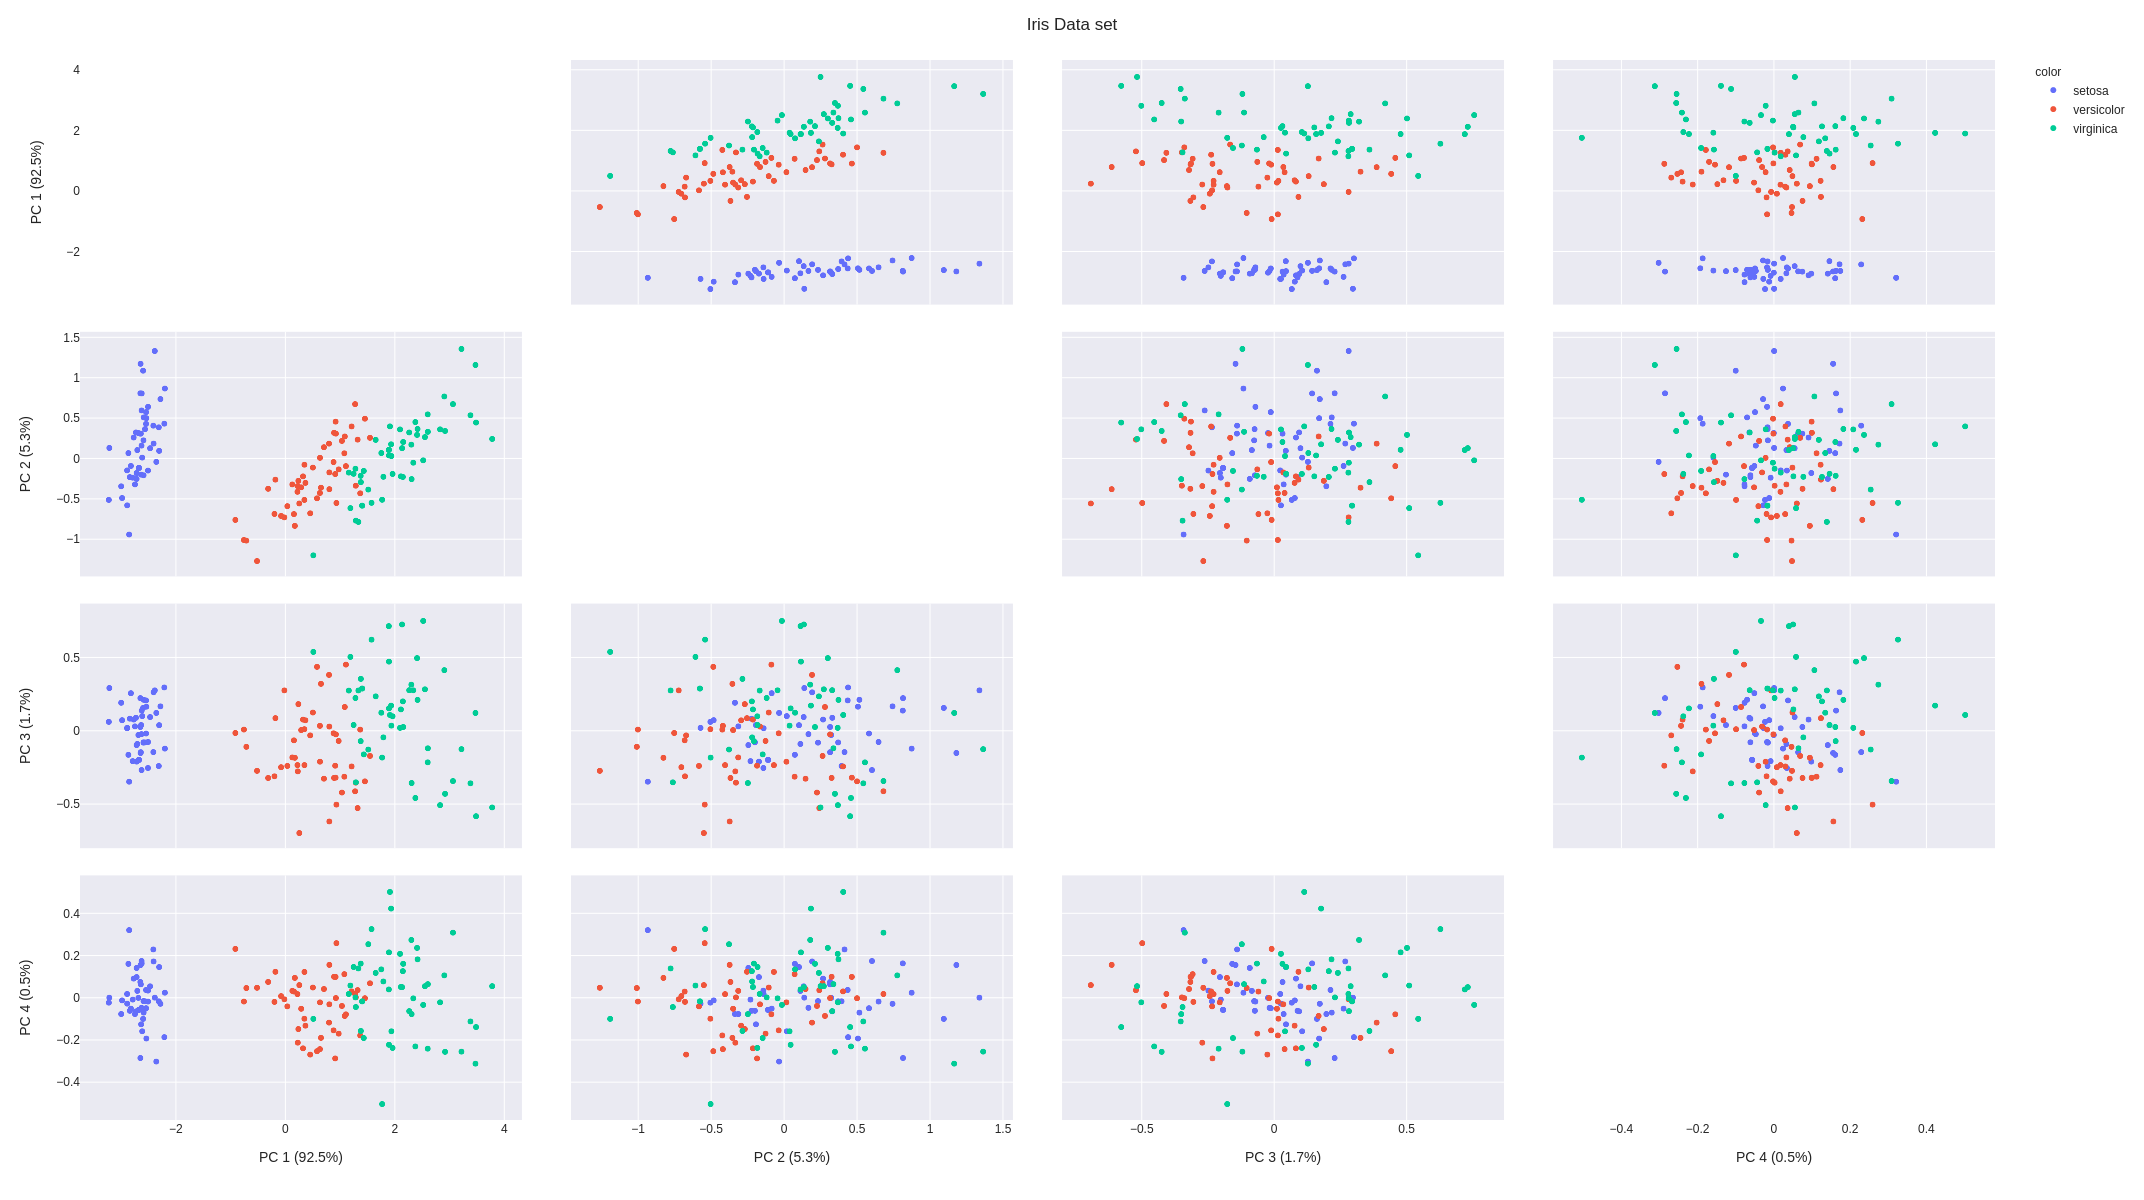

In [6]:
import plotly.express as px
from sklearn.decomposition import PCA

df = px.data.iris()
features = ["sepal_width", "sepal_length", "petal_width", "petal_length"]

pca = PCA()
components = pca.fit_transform(df[features])
labels = {
    str(i): f"PC {i+1} ({var:.1f}%)"
    for i, var in enumerate(pca.explained_variance_ratio_ * 100)
}

fig = px.scatter_matrix(
    components,
    labels=labels,
    dimensions=range(4),
    color=df["species"]
)
fig.update_traces(diagonal_visible=False)
fig.update_layout(
    title='Iris Data set',
    dragmode='select',
    width=1600,
    height=1200,
    hovermode='closest',
    template ="seaborn"
)
fig.show()

## Visualize a subset of the principal components

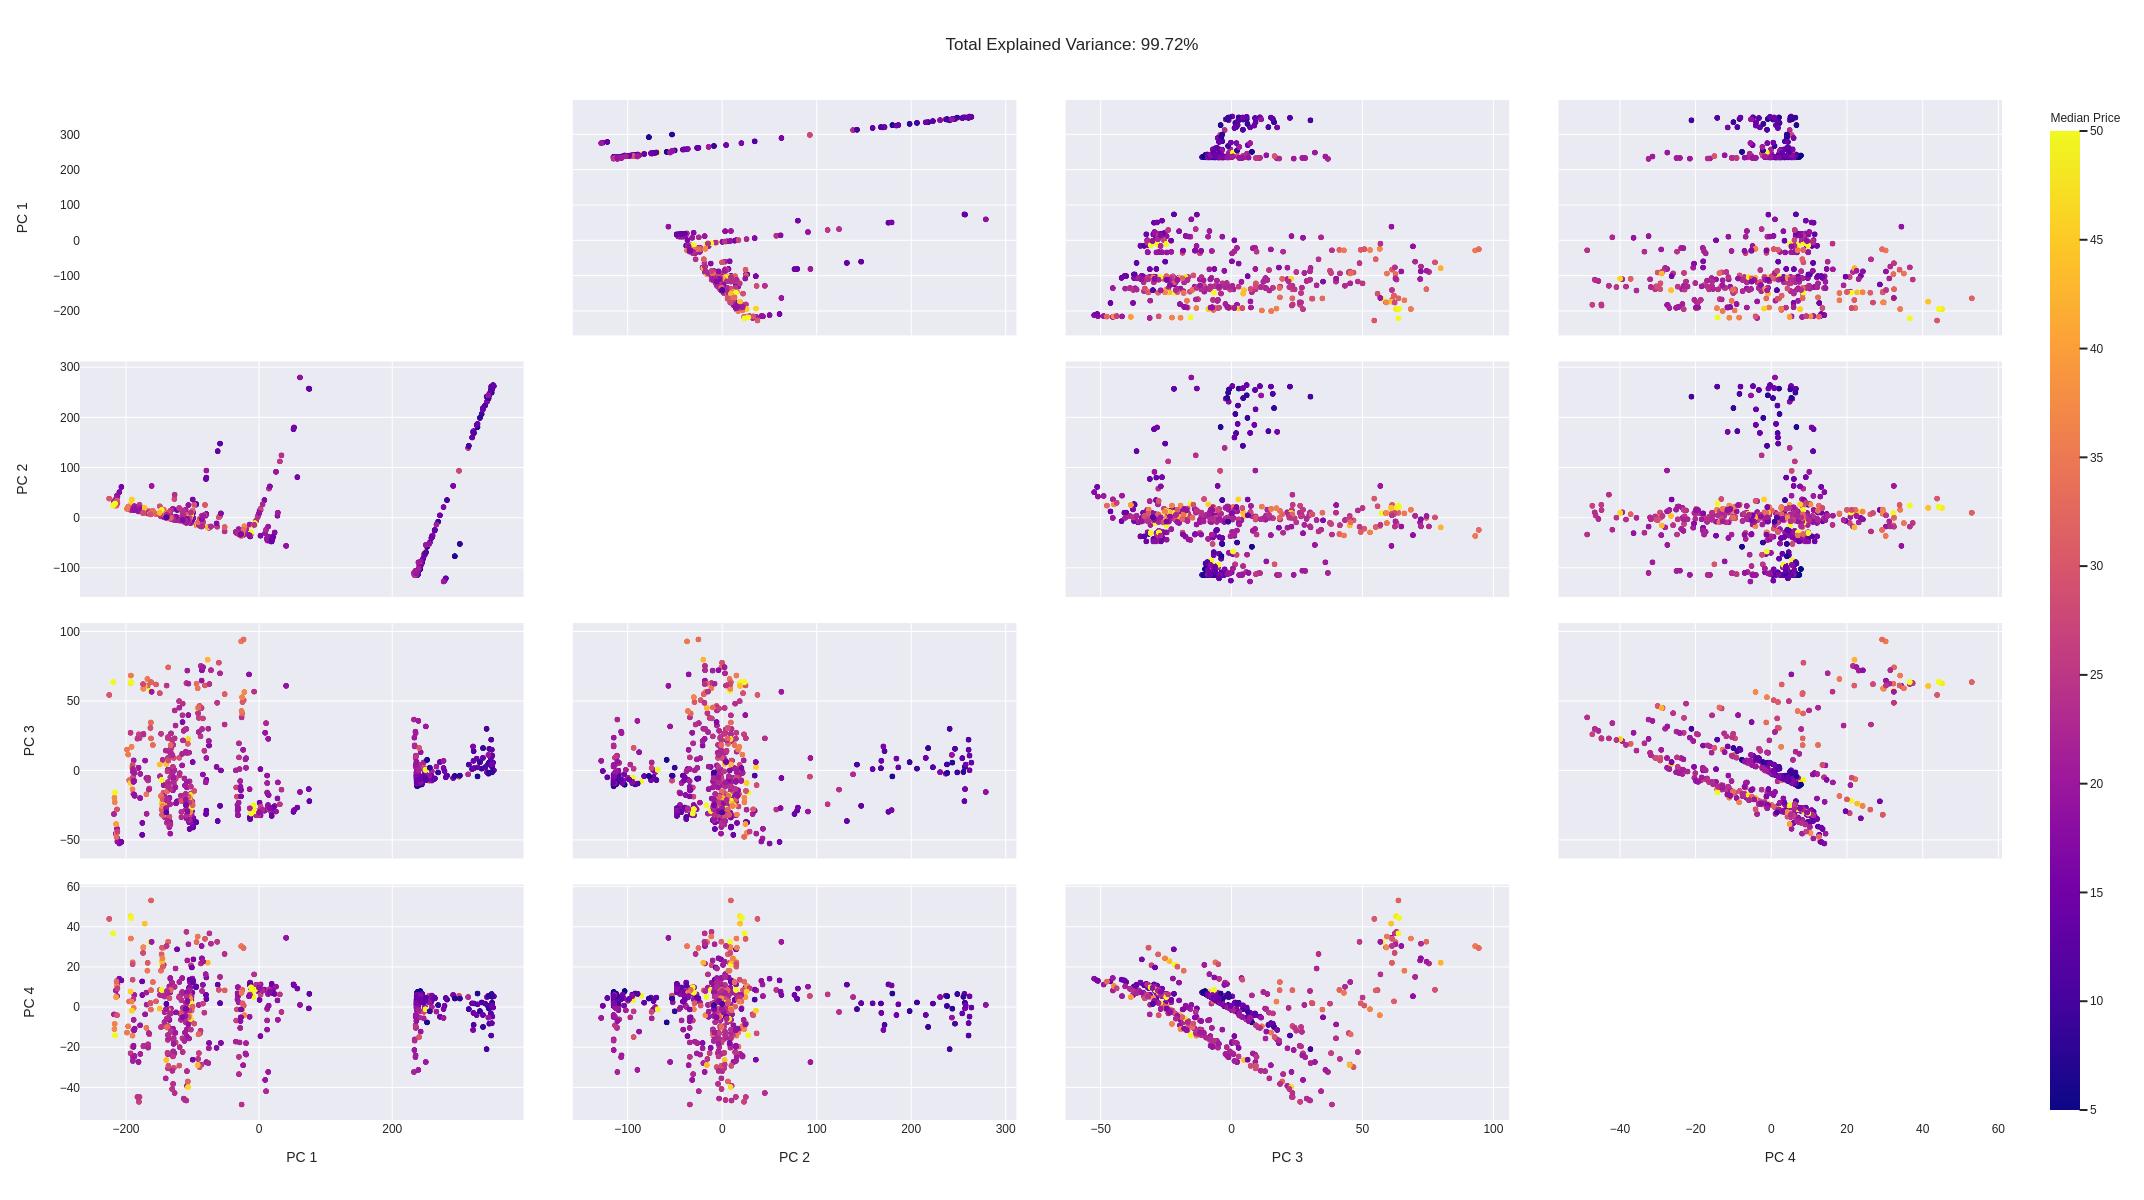

In [5]:
import pandas as pd
import plotly.express as px
from sklearn.decomposition import PCA
from sklearn.datasets import load_boston

boston = load_boston()
df = pd.DataFrame(boston.data, columns=boston.feature_names)
n_components = 4

pca = PCA(n_components=n_components)
components = pca.fit_transform(df)

total_var = pca.explained_variance_ratio_.sum() * 100

labels = {str(i): f"PC {i+1}" for i in range(n_components)}
labels['color'] = 'Median Price'

fig = px.scatter_matrix(
    components,
    color=boston.target,
    dimensions=range(n_components),
    labels=labels,
    title=f'Total Explained Variance: {total_var:.2f}%',
)
fig.update_traces(diagonal_visible=False)
fig.update_layout(
    dragmode='select',
    width=1600,
    height=1200,
    hovermode='closest',
    template ="seaborn"
)
fig.show()

## 2D PCA Scatter Plot

In the previous examples, you saw how to visualize high-dimensional PCs. In this example, we show you how to simply visualize the first two principal components of a PCA, by reducing a dataset of 4 dimensions to 2D.

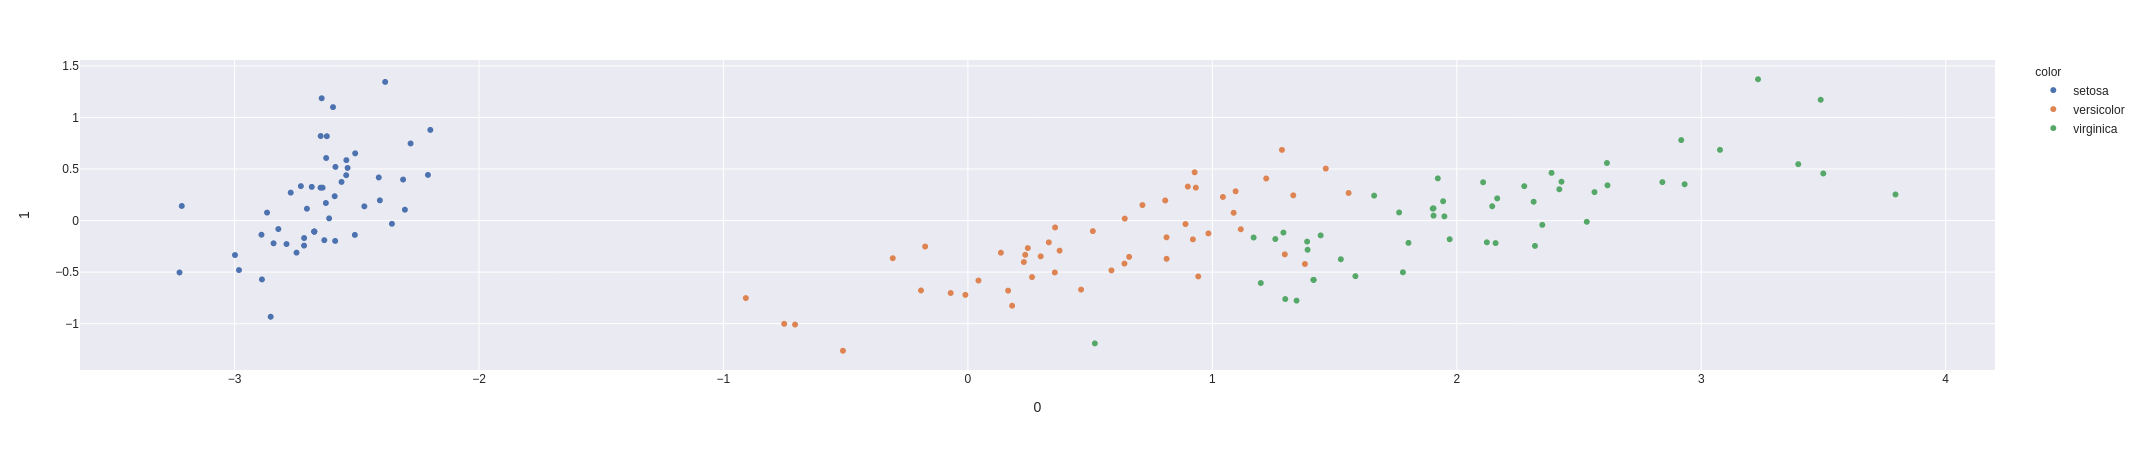

In [8]:
import plotly.express as px
from sklearn.decomposition import PCA

df = px.data.iris()
X = df[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]

pca = PCA(n_components=2)
components = pca.fit_transform(X)

fig = px.scatter(components, x=0, y=1, color=df['species'],
    template ="seaborn")
fig.show()


## Visualize PCA with px.scatter_3d

With px.scatter_3d, you can visualize an additional dimension, which let you capture even more variance.

In [11]:
df.head()

sepal_length  sepal_width  petal_length  petal_width species  species_id
0           5.1          3.5           1.4          0.2  setosa           1
1           4.9          3.0           1.4          0.2  setosa           1
2           4.7          3.2           1.3          0.2  setosa           1
3           4.6          3.1           1.5          0.2  setosa           1
4           5.0          3.6           1.4          0.2  setosa           1

In [14]:
pca

PCA(n_components=3)

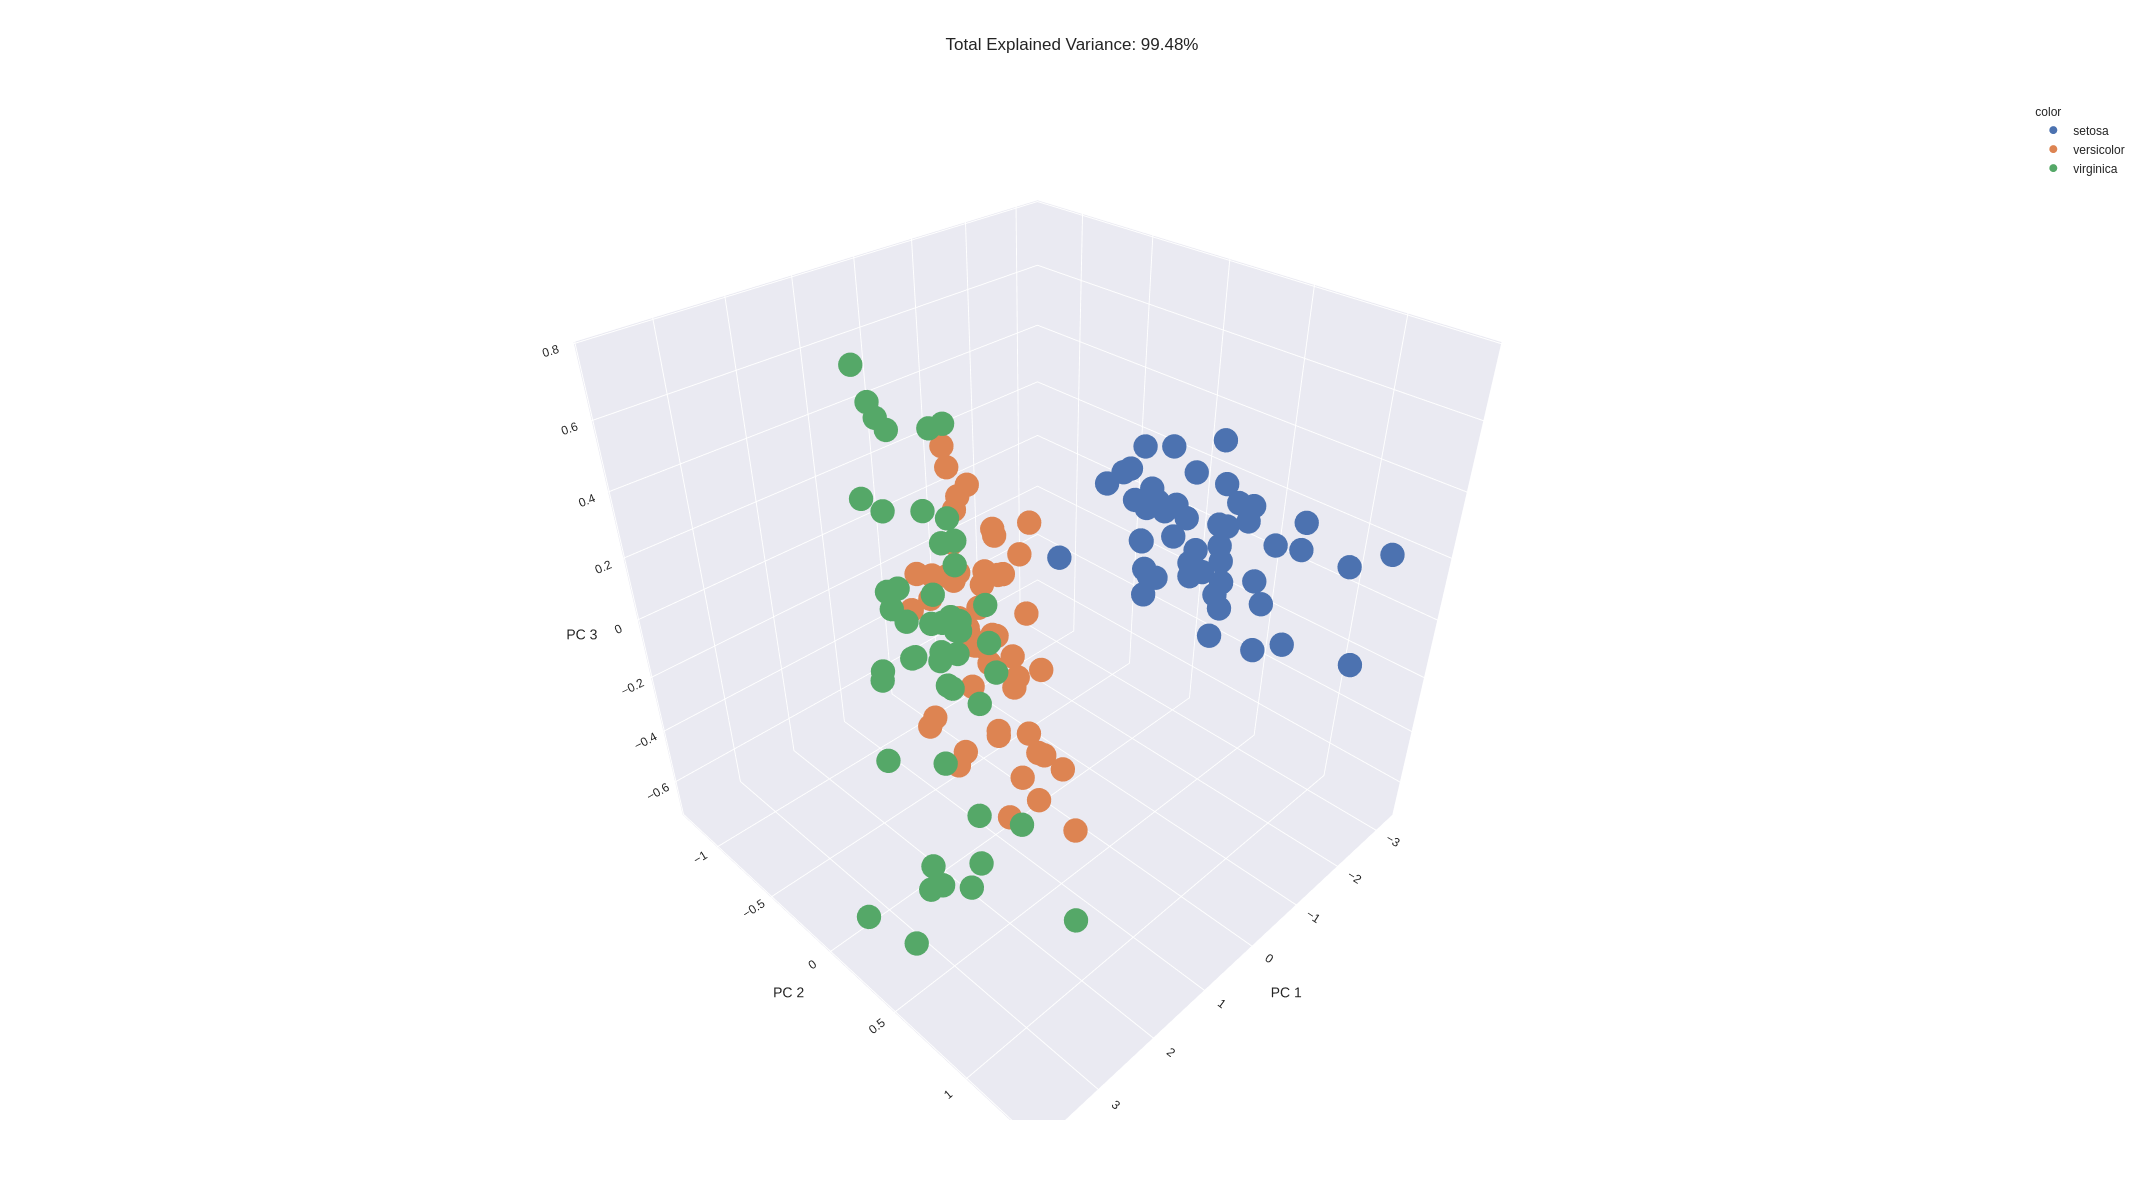

In [10]:
import plotly.express as px
from sklearn.decomposition import PCA

df = px.data.iris()
X = df[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]

pca = PCA(n_components=3)
components = pca.fit_transform(X)

total_var = pca.explained_variance_ratio_.sum() * 100

fig = px.scatter_3d(
    components, x=0, y=1, z=2, color=df['species'],
    title=f'Total Explained Variance: {total_var:.2f}%',
    labels={'0': 'PC 1', '1': 'PC 2', '2': 'PC 3'},
    template ="seaborn",
    width=1600,
    height=1200
)
fig.show()

## Plotting explained variance

Often, you might be interested in seeing how much variance PCA is able to explain as you increase the number of components, in order to decide how many dimensions to ultimately keep or analyze. This example shows you how to quickly plot the cumulative sum of explained variance for a high-dimensional dataset like Diabetes.

With a higher explained variance, you are able to capture more variability in your dataset, which could potentially lead to better performance when training your model. For a more mathematical explanation, see this Q&A thread.


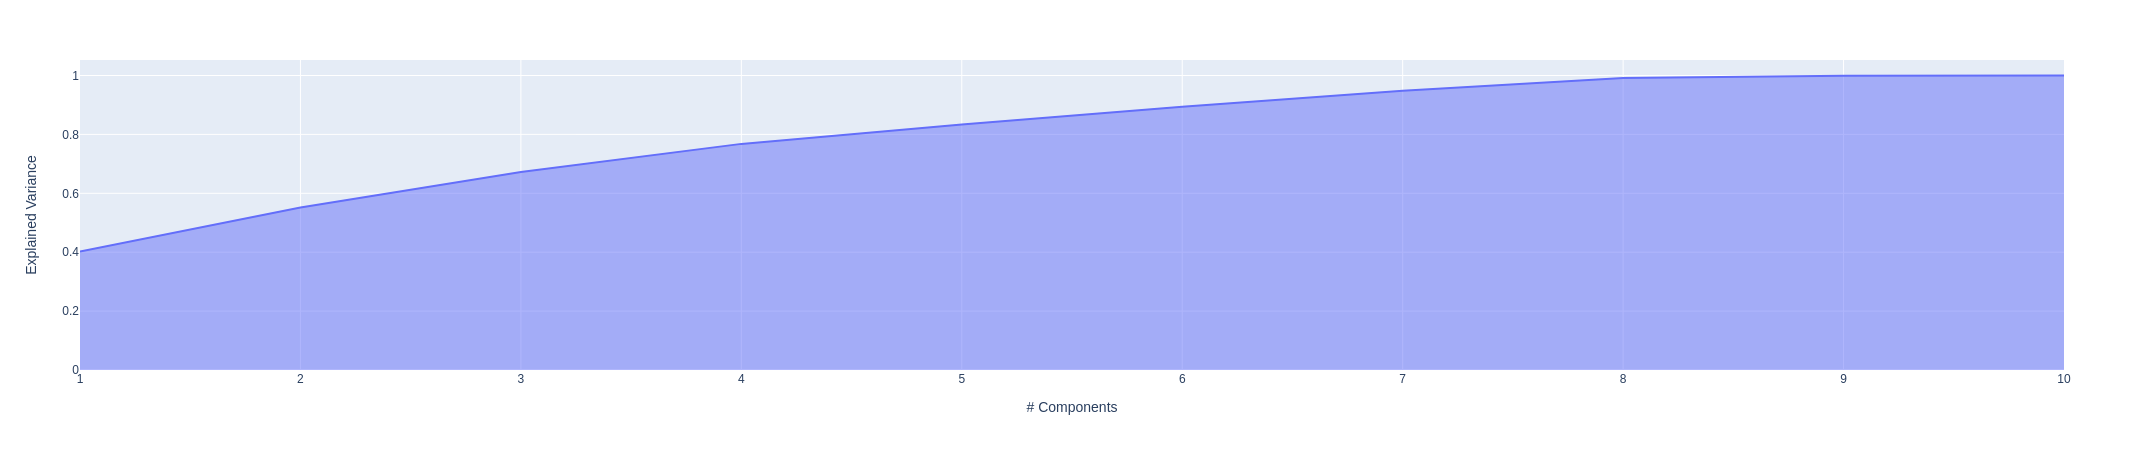

In [15]:
import plotly.express as px
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.datasets import load_diabetes

boston = load_diabetes()
df = pd.DataFrame(boston.data, columns=boston.feature_names)

pca = PCA()
pca.fit(df)
exp_var_cumul = np.cumsum(pca.explained_variance_ratio_)

px.area(
    x=range(1, exp_var_cumul.shape[0] + 1),
    y=exp_var_cumul,
    labels={"x": "# Components", "y": "Explained Variance"}
)

In [16]:
df.head()

age       sex       bmi        bp        s1        s2        s3  \
0  0.038076  0.050680  0.061696  0.021872 -0.044223 -0.034821 -0.043401   
1 -0.001882 -0.044642 -0.051474 -0.026328 -0.008449 -0.019163  0.074412   
2  0.085299  0.050680  0.044451 -0.005671 -0.045599 -0.034194 -0.032356   
3 -0.089063 -0.044642 -0.011595 -0.036656  0.012191  0.024991 -0.036038   
4  0.005383 -0.044642 -0.036385  0.021872  0.003935  0.015596  0.008142   

         s4        s5        s6  
0 -0.002592  0.019908 -0.017646  
1 -0.039493 -0.068330 -0.092204  
2 -0.002592  0.002864 -0.025930  
3  0.034309  0.022692 -0.009362  
4 -0.002592 -0.031991 -0.046641

In [17]:
exp_var_cumul 

array([0.40242142, 0.55165324, 0.67224947, 0.76779711, 0.83401567,
       0.89428759, 0.94794364, 0.99131196, 0.99914395, 1.        ])

## Visualize Loadings

It is also possible to visualize loadings using shapes, and use annotations to indicate which feature a certain loading original belong to. Here, we define loadings as:


loadings=eigenvectors⋅sqrt(eigenvalues)

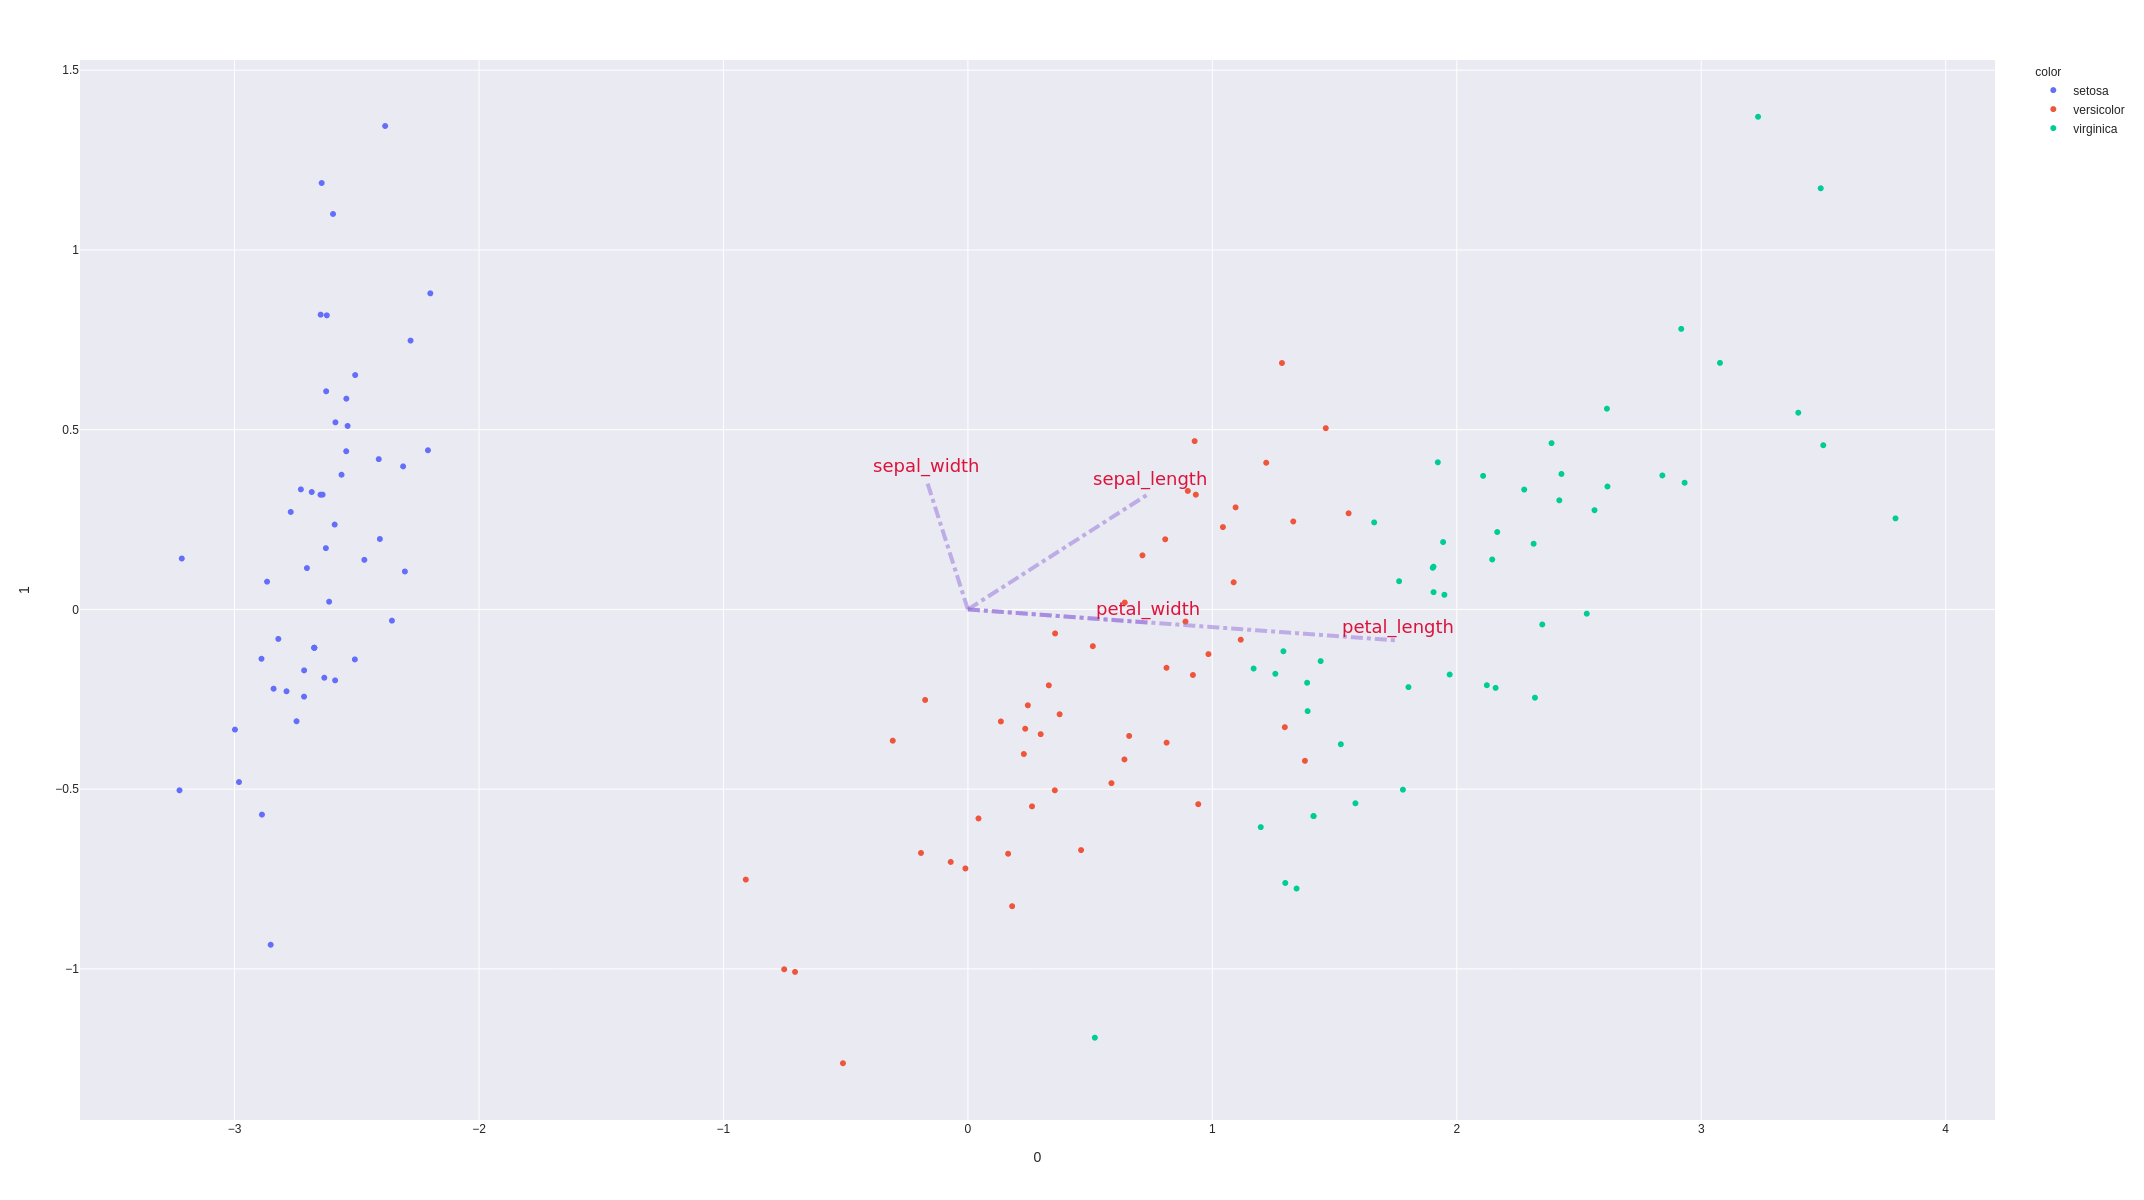

In [30]:
import plotly.express as px
from sklearn.decomposition import PCA
from sklearn import datasets
from sklearn.preprocessing import StandardScaler

df = px.data.iris()
features = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
X = df[features]

pca = PCA(n_components=2)
components = pca.fit_transform(X)

loadings = pca.components_.T * np.sqrt(pca.explained_variance_)

fig = px.scatter(components, x=0, y=1, color=df['species'])

for i, feature in enumerate(features):
    fig.add_shape(
        type='line',
        x0=0, y0=0,
        x1=loadings[i, 0],
        y1=loadings[i, 1],
        line = dict(color="MediumPurple", # added to be more visible in seaborn theme
                    width=4,
                dash="dashdot",)
    )
    fig.add_annotation(
        x=loadings[i, 0],
        y=loadings[i, 1],
        ax=0, ay=0,
        xanchor="center",
        yanchor="bottom",
        text=feature,
        font=dict(
        family="sans serif",
        size=18,
        color="crimson")
    )
# added to be larger and more pleasant to the eyes
fig.update_layout( 
    dragmode='select',
    width=1600,
    height=1200,
    hovermode='closest',
    template ="seaborn"
)
fig.show()

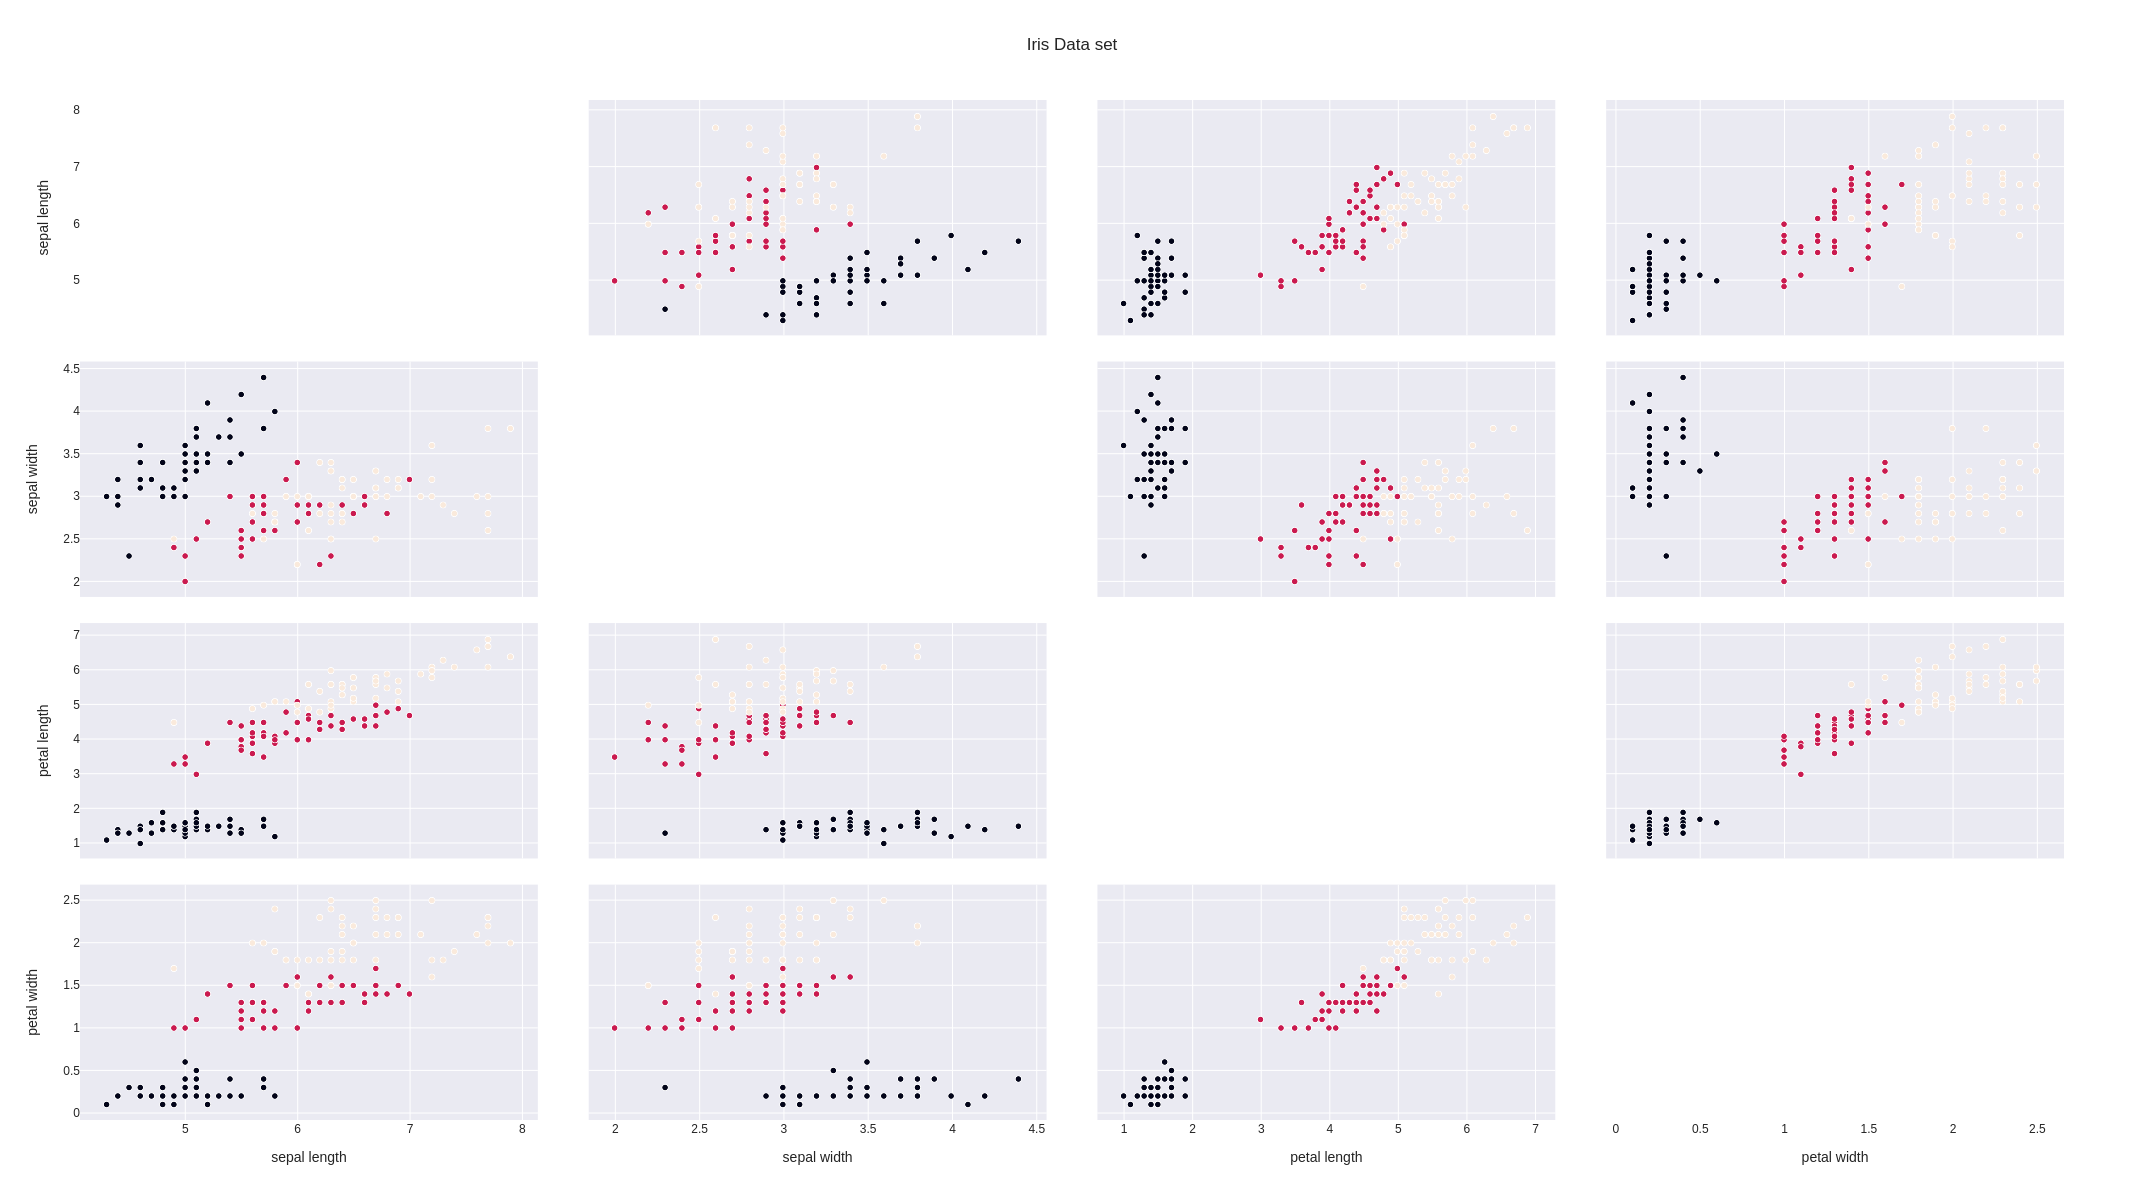

In [18]:
import plotly.graph_objects as go
import pandas as pd

df = pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/iris-data.csv')
index_vals = df['class'].astype('category').cat.codes

fig = go.Figure(data=go.Splom(
                dimensions=[dict(label='sepal length',
                                 values=df['sepal length']),
                            dict(label='sepal width',
                                 values=df['sepal width']),
                            dict(label='petal length',
                                 values=df['petal length']),
                            dict(label='petal width',
                                 values=df['petal width'])],
                diagonal_visible=False, # remove plots on diagonal
                text=df['class'],
                marker=dict(color=index_vals,
                            showscale=False, # colors encode categorical variables
                            line_color='white', line_width=0.5)
                ))

fig.update_traces(diagonal_visible=False)
fig.update_layout(
    title='Iris Data set',
    dragmode='select',
    width=1600,
    height=1200,
    hovermode='closest',
    template ="seaborn"
)
fig.show()